# LDA

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pandas as pd

# Data 불러오기
## 40명의 10장씩 사진 (112,92) => (40,10,112*92)로

In [15]:
subject=[]
ori_subject=[]
for i in range(1,41):
  path = './att_faces/s'+str(i)
  file_list = os.listdir(path)
  line=[]
  line_1=[]
  for j in range(10):
    with Image.open(path+"/"+file_list[j]) as im:
      a = np.asarray(im)
      line.append(a)
      
      a_1=a.reshape(112*92,)
      line_1.append(a_1)
  ori_subject.append(line)
  subject.append(line_1)

subject=np.asarray(subject)
ori_subject = np.asarray(ori_subject)

In [16]:
subject.shape

(40, 10, 10304)

In [13]:
# train, test 나누기 (train:36명, test:4명)

In [14]:
train=[]
ori_train=[]
test=[]
ori_test=[]

ran_list = []
train_index=[]

for i in range(40):
  ran_list.append(i)
test_index = random.sample(ran_list,4)

for i in range(4):
  test.append(subject[test_index[i]])
test=np.asarray(test)
#test= test.reshape(4*10,10304)
ori_test = test.reshape(40,112,92)


for i in range(40):
  is_test=False
  for j in test_index:
    
    if i == j:
      is_test=True
      continue
  if is_test == True:
    continue
  train_index.append(i)
  train.append(subject[i])
  #print('trian index = ', i )
train=np.asarray(train)
#train = train.reshape(35*10, 10304)
ori_train=train.reshape(360,112,92)

print('train index : ',train_index)
print('test index : ', test_index)
print('\n train : \n',train, '\n shape: \n ',train.shape)
print('\n test: \n',test, '\n shape: \n', test.shape)

train index :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 39]
test index :  [38, 22, 0, 37]

 train : 
 [[[ 35  36  37 ... 144 147 143]
  [ 37  34  38 ... 135 143 133]
  [ 37  35  35 ...  26  28  28]
  ...
  [ 38  35  36 ... 138 142 141]
  [ 34  39  35 ... 135 138 148]
  [ 43  39  36 ... 154 155 141]]

 [[103 105 104 ...  44  38  43]
  [104 109 103 ...  57  56  59]
  [100  99 108 ...  44  42  44]
  ...
  [109 111 108 ...  52  55  48]
  [107 104 109 ...  58  56  57]
  [104 109 104 ...  52  59  56]]

 [[115 113 113 ...  56  52  55]
  [119 124 118 ...  75  77  82]
  [116 112 115 ...  51  55  54]
  ...
  [119 121 123 ...  75  79  78]
  [118 114 117 ...  58  54  52]
  [114 118 114 ...  54  55  52]]

 ...

 [[ 63  67  65 ...  54  61  69]
  [ 47  42  53 ...  36  70  82]
  [ 46  45  47 ...  46  50  50]
  ...
  [ 46  48  41 ...  35  36  37]
  [ 48  47  47 ... 120 104  66]
  [ 45  45  48 ...  76  79  70]]

 

In [15]:
test.shape[0]

4

In [16]:
def plot_test(test, people, m):
    fig, axes=plt.subplots(people,m)
    for i in range(people*m):
        for image, ax in zip(test.astype(np.float32), axes.ravel()):
            ax.imshow(image)
    
    plt.show()

In [17]:
class LinearDiscriminantAnalysis():

    
    def __init__(self):
        
        # eigen vector matrix
        self.eigen_mat = None
        # eigen value matrix (후에 크기별로 정렬할때 필요)
        self.eigen_val = None
        # n_components 만큼
        self.reduced_eigen_mat = None
        
        self.Sw=0
        self.Sw_inverse=None
        self.Sb=None
        self.cov=None
        
    def fit(self, x):
        # data를 zero centered
        
        # 클래스별 평균
        m=[]
        for i in range(len(x)):
            mean = np.mean(x[i], axis=0, keepdims=True)
            m.append(mean)
        m=np.asarray(m)
        
        # 클래스 전체 평균
        m_all = np.mean(m,axis=0)
        
        mean_set = m - m_all
        mean_set = mean_set.squeeze()
        
        #Sb
        self.Sb = np.matmul(mean_set.T, mean_set)
        
        
        # Sw
        si = (x-m)
        for i in range(len(si)):
            self.Sw += np.cov(si[i].T)/10
        
        
        self.Sw_inverse = np.linalg.pinv(self.Sw)
        
        x=x.reshape(x.shape[0]*x.shape[1],x.shape[2])
        n, d = x.shape
        self.cov = np.matmul(self.Sw_inverse, self.Sb)
        self.cov = (self.cov+self.cov.T)/2
        
        eigvals, eigvecs = np.linalg.eigh(self.cov)
        eig_pairs = [(eigvals[i], eigvecs[:, i]) for i in range(d)]
        sorted_eig = sorted(eig_pairs, key=lambda tup: tup[0], reverse=True)
        
        self.eigen_mat = np.stack(list(map(lambda tup: tup[1], sorted_eig)), axis=1)
        self.eigen_val = np.array(list(map(lambda tup: tup[0], sorted_eig)))
        
    def transform(self, x, n_components):
        
        self.reduced_eigen_mat = self.eigen_mat[:, :n_components]
        
        results = np.matmul(x, self.reduced_eigen_mat)
        
        return results
    

In [18]:
lda = LinearDiscriminantAnalysis()

In [19]:
lda.fit(train)

In [20]:
lda.Sw

array([[ 666.68      ,  651.21555556,  643.42333333, ...,   47.61555556,
          37.86555556,   90.79222222],
       [ 651.21555556,  694.36444444,  659.50111111, ...,   30.79333333,
          25.47222222,   78.24555556],
       [ 643.42333333,  659.50111111,  681.74111111, ...,   50.47888889,
          45.41777778,   87.72444444],
       ...,
       [  47.61555556,   30.79333333,   50.47888889, ..., 2686.43444444,
        1701.35333333, 1238.95555556],
       [  37.86555556,   25.47222222,   45.41777778, ..., 1701.35333333,
        1973.81888889, 1569.16      ],
       [  90.79222222,   78.24555556,   87.72444444, ..., 1238.95555556,
        1569.16      , 2060.29666667]])

In [21]:
lda.Sb

array([[41826.39555556, 41558.27333333, 41370.05888889, ...,
        -7255.91111111, -5608.93222222, -3924.76111111],
       [41558.27333333, 41352.16      , 41132.46333333, ...,
        -7012.08666667, -5469.04333333, -3848.23666667],
       [41370.05888889, 41132.46333333, 40963.42972222, ...,
        -7025.53027778, -5439.93805556, -3837.27027778],
       ...,
       [-7255.91111111, -7012.08666667, -7025.53027778, ...,
        59398.30972222, 57501.72194444, 55769.62972222],
       [-5608.93222222, -5469.04333333, -5439.93805556, ...,
        57501.72194444, 56538.59638889, 54804.93194444],
       [-3924.76111111, -3848.23666667, -3837.27027778, ...,
        55769.62972222, 54804.93194444, 54044.12972222]])

In [22]:
lda.Sw_inverse

array([[ 1.50117262e-07,  8.12534926e-08,  8.42963106e-08, ...,
        -4.28351930e-08,  2.99164303e-08,  3.22243110e-08],
       [ 8.12534926e-08,  1.64422836e-07,  6.66304341e-08, ...,
        -1.13039944e-07, -4.37745563e-08, -5.18792718e-08],
       [ 8.42963106e-08,  6.66304341e-08,  1.38501005e-07, ...,
        -2.55305864e-08,  1.12979324e-07,  6.57032284e-08],
       ...,
       [-4.28351930e-08, -1.13039944e-07, -2.55305864e-08, ...,
         2.80797532e-06,  9.48446216e-07,  4.66090593e-07],
       [ 2.99164303e-08, -4.37745563e-08,  1.12979324e-07, ...,
         9.48446216e-07,  2.19026387e-06,  1.38946142e-06],
       [ 3.22243110e-08, -5.18792718e-08,  6.57032284e-08, ...,
         4.66090593e-07,  1.38946142e-06,  2.25676709e-06]])

- cov = np.matmul(Sw_inverse, Sb)
- cov의 eigenvalue들이 복소수가 나와서 cov를 symmetric하게 만든 후 eigh 사용
- cov를 symmetric하게 하기 위해 cov = (cov+cov.T)/2

In [23]:
lda.cov

array([[ 0.05566817,  0.11018435,  0.07837465, ..., -0.10561497,
        -0.13172501, -0.14118594],
       [ 0.11018435,  0.16276912,  0.13135492, ..., -0.12727962,
        -0.15293996, -0.15412756],
       [ 0.07837465,  0.13135492,  0.09990197, ..., -0.10320914,
        -0.12759807, -0.13052135],
       ...,
       [-0.10561497, -0.12727962, -0.10320914, ...,  1.21728113,
         0.96590261,  0.95257662],
       [-0.13172501, -0.15293996, -0.12759807, ...,  0.96590261,
         0.74594138,  0.72354327],
       [-0.14118594, -0.15412756, -0.13052135, ...,  0.95257662,
         0.72354327,  0.70015885]])

## n_components = 3

In [24]:
test_transformed_3 = lda.transform(test,3)

In [25]:
print(test_transformed_3, test_transformed_3.shape)

[[[-3492.21452296  3036.44967439 -1461.9421374 ]
  [-3592.75103483  3710.75482201  -958.09400406]
  [-3342.25551791  2866.12656259 -1402.45932168]
  [-3096.30129021  3040.74289931 -1092.68697166]
  [-3278.71019215  2804.95237904  -922.05376552]
  [-3386.2666891   3695.19560631 -1265.9287043 ]
  [-3184.37694443  3410.09125147 -1506.88170381]
  [-3597.66397275  4141.22526245 -1508.48485076]
  [-3663.47891601  4080.30685829 -1579.02015182]
  [-3412.63975539  3806.24257157 -1490.47316926]]

 [[-5454.49302003  6106.39239116  -803.48995068]
  [-5564.57160748  5848.38185341  -753.12451422]
  [-5310.79366955  6083.57722922  -879.13510646]
  [-4536.87681967  5828.32962919 -1491.01371411]
  [-4687.74242064  5635.34957838 -1672.55798623]
  [-4489.12267949  5841.11508211 -1424.1065621 ]
  [-4804.05226526  5668.93263349 -1616.82439243]
  [-4788.64851694  5611.42130991 -1297.35195285]
  [-5091.87374696  6115.09652907  -936.94985276]
  [-5401.76773649  5900.46268503 -1015.14379179]]

 [[-6653.9828319

## Fisher Face

In [26]:
fisher_face_3 = lda.reduced_eigen_mat.T.reshape(3,112,92)
fisher_face_3.shape

(3, 112, 92)

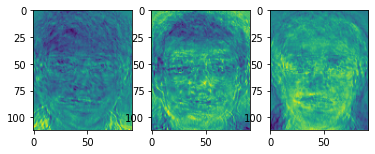

In [27]:
plot_test(fisher_face_3.astype(np.float32),1,3)

In [28]:
# gallery, query로 나누기

In [19]:
def split_gallery_query(test_transformed):
    test_transformed = test_transformed.reshape(4,10,test_transformed.shape[2])
    print('test transformed shape : ', test_transformed.shape)
    gallery_trans=[]
    query_trans=[]
    for i in range(4):
        #gallery_trans.append(i+1)
        for j in range(10):
            if j < 7:
                gallery_trans.append(test_transformed[i][j])
            else :
                query_trans.append(test_transformed[i][j])

    gallery_trans=np.asarray(gallery_trans)
    query_trans=np.asarray(query_trans)
    #print('gallery : \n',gallery_trans,'\n gallery shape : \n', gallery_trans.shape)
    #print('query : \n',query_trans,'\n query shape : \n', query_trans.shape)
    return gallery_trans, query_trans

In [30]:
gallery_trans_3, query_trans_3 = split_gallery_query(test_transformed_3)

test transformed shape :  (4, 10, 3)


In [31]:
# gallery query scatter

In [20]:
def scatter(gallery_trans, query_trans):
    plt.figure(figsize=(8, 8), dpi=120)

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    x=gallery_trans[:,0].astype(np.float32)
    y=gallery_trans[:,1].astype(np.float32)
    z=gallery_trans[:,2].astype(np.float32)

    x1=query_trans[:,0].astype(np.float32)
    y1=query_trans[:,1].astype(np.float32)
    z1=query_trans[:,2].astype(np.float32)

    ax.scatter(x,y,z)
    ax.scatter(x1,y1,z1, c='red')

    plt.show()

<Figure size 960x960 with 0 Axes>

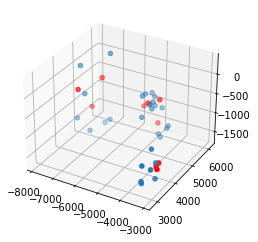

In [33]:
scatter(gallery_trans_3, query_trans_3)

In [21]:
def knn_accuracy(gallery_trans, query_trans, knn_num):
    gallery_trans = gallery_trans.reshape(1,28,gallery_trans.shape[1])
    query_trans = query_trans.reshape(12,1,query_trans.shape[1])

    # query gallery 거리 찾기
    distance = np.sum(np.square(query_trans-gallery_trans),axis=-1)
    #print(distance, distance.shape)

    # sorting하여 가까운 사진 index로 정렬
    sort_distance = np.argsort(distance, axis=1).reshape(4,3,28)
    #print(sort_distance, sort_distance.shape)

    # knn_num개 knn
    knn = sort_distance[:,:,:knn_num]//7
    #print(knn, knn.shape)
    knn = knn.reshape(12,knn_num)


    # count[0] = 1번 사람이라고 예측한 수
    count = []

    for row in knn:
        # knn행별로 사람 플러스 해줄 임시 배열
        temp = [0 for i in range(4)]
        for j in range(knn_num):
            temp[row[j]]+=1
        count.append(temp)
    count=np.asarray(count).reshape(4,3,4)
    #print(count, count.shape)

    # 정확도
    accuracy = (np.sum(count, axis=1)/(3*knn_num))*100
    
    accuracy = pd.DataFrame(accuracy, columns=['1','2','3','4'], index=['1','2','3','4'])

    
    return accuracy

In [35]:
accuracy_3 = knn_accuracy(gallery_trans_3, query_trans_3, 7)
accuracy_n_3=np.trace(accuracy_3)/4

## n_components = 10

In [36]:
test_transformed_10 = lda.transform(test,10)

In [37]:
reduced_eigen_mat_10 = lda.reduced_eigen_mat

## Fisher Face

In [38]:
test_fisher_10 = reduced_eigen_mat_10.T.reshape(10,112,92)
test_fisher_10.shape

(10, 112, 92)

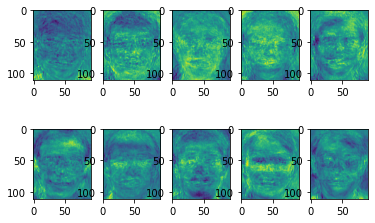

In [39]:
plot_test(test_fisher_10,2,5)

In [40]:
gallery_trans_10 , query_trans_10 = split_gallery_query(test_transformed_10)

test transformed shape :  (4, 10, 10)


<Figure size 960x960 with 0 Axes>

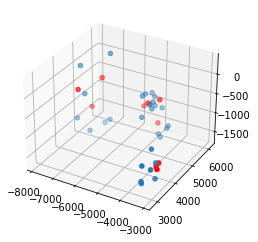

In [41]:
scatter(gallery_trans_10, query_trans_10)

In [42]:
accuracy_10 = knn_accuracy(gallery_trans_10, query_trans_10, 7)
accuracy_n_10=np.trace(accuracy_10)/4

# n_components = 35
- Sb를 구할때 train 의 class 수가 36이므로 n_components = 35 까지 사용 가능

In [43]:
test_transformed_35 = lda.transform(test, 35)

In [44]:
reduced_eigen_mat_35 = lda.reduced_eigen_mat

## Fisher face

In [45]:
test_fisher_35 = reduced_eigen_mat_35.T.reshape(35,112,92)
test_fisher_35.shape

(35, 112, 92)

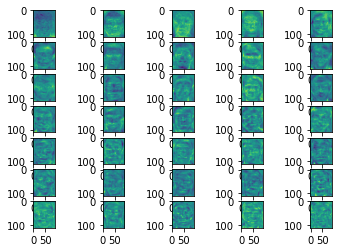

In [46]:
plot_test(test_fisher_35,7,5)

In [47]:
gallery_trans_35 , query_trans_35 = split_gallery_query(test_transformed_35)

test transformed shape :  (4, 10, 35)


<Figure size 960x960 with 0 Axes>

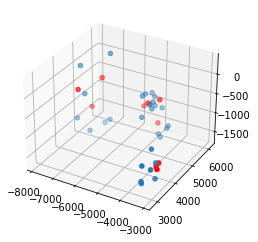

In [48]:
scatter(gallery_trans_35, query_trans_35)

In [49]:
accuracy_35 = knn_accuracy(gallery_trans_35, query_trans_35, 7)
accuracy_n_35=np.trace(accuracy_35)/4

# n_components = 3, 10, 35 에 따른 정확도 비교

In [50]:
print('n_components = 3 일때 정확도 : ', accuracy_n_3)

n_components = 3 일때 정확도 :  82.14285714285714


In [51]:
print('n_components = 10 일때 정확도 : ', accuracy_n_10)

n_components = 10 일때 정확도 :  84.52380952380952


In [52]:
print('n_components = 35 일때 정확도 : ', accuracy_n_35)

n_components = 35 일때 정확도 :  86.9047619047619


# 10-Fold

In [23]:
truncatedSubject = np.split(subject, 10, axis=0)
truncatedSubject=np.asarray(truncatedSubject)

In [24]:
truncatedSubject.shape

(10, 4, 10, 10304)

In [25]:
accuracy = []
for i in range (10):
    print(i+1,'번째 실행')
    test = truncatedSubject[i].reshape(4,10,10304)
    
    train=[]
    for j in range(10):
        if i!=j:
            train.append(truncatedSubject[j])
    train=np.asarray(train).reshape(36,10,10304)
    #fit
    lda.fit(train)
    print(i+1,'번째 fit 완료')
    
    # transform
    test_transformed=lda.transform(test,10)
    
    # query gallery 나누기
    gallery_trans, query_trans = split_gallery_query(test_transformed)
    
    

    accuracy.append(knn_accuracy(gallery_trans, query_trans, 7))
    print(accuracy[i])

1 번째 실행
1 번째 fit 완료
test transformed shape :  (4, 10, 10)
           1           2          3          4
1  80.952381   14.285714   4.761905   0.000000
2   0.000000  100.000000   0.000000   0.000000
3   0.000000    0.000000  57.142857  42.857143
4   0.000000    0.000000  14.285714  85.714286
2 번째 실행
2 번째 fit 완료
test transformed shape :  (4, 10, 10)
       1      2      3      4
1  100.0    0.0    0.0    0.0
2    0.0  100.0    0.0    0.0
3    0.0    0.0  100.0    0.0
4    0.0    0.0    0.0  100.0
3 번째 실행
3 번째 fit 완료
test transformed shape :  (4, 10, 10)
       1      2      3      4
1  100.0    0.0    0.0    0.0
2    0.0  100.0    0.0    0.0
3    0.0    0.0  100.0    0.0
4    0.0    0.0    0.0  100.0
4 번째 실행
4 번째 fit 완료
test transformed shape :  (4, 10, 10)
       1      2          3          4
1  100.0    0.0   0.000000   0.000000
2    0.0  100.0   0.000000   0.000000
3    0.0    0.0  90.476190   9.523810
4    0.0    0.0  28.571429  71.428571
5 번째 실행
5 번째 fit 완료
test transformed shape 

In [26]:
accuracy_all = pd.DataFrame(np.sum(accuracy, axis=0)/10, columns=['1','2','3','4'], index=['1','2','3','4'])
accuracy_all

,1,2,3,4
1,95.714286,1.904762,0.952381,1.428571
2,0.476190,99.523810,0.000000,0.000000
3,2.857143,7.142857,83.333333,6.666667
4,1.904762,2.380952,7.142857,88.571429


In [27]:
np.trace(accuracy_all)/4

91.78571428571428

# LDA 정확도 : 91.79%